In [7]:
!pip install --upgrade pandas    
!pip install --upgrade pandas-datareader


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data  # used to scrap data from yahoofinanace website

In [33]:
import yfinance as yf


start = '2010-01-01'
end = '2024-04-30'

df = yf.download('AAPL', start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465663,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393282,447610800
...,...,...,...,...,...,...
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.481216,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.595917,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.463730,50558300


In [9]:
!pip install yfinance

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.481216,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.595917,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.463730,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,168.875214,44838400
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.064667,68169400


In [11]:
 df= df.reset_index() # dates have now beacome just a column
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465663,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393282,447610800


In [12]:
df= df.drop(['Date','Adj Close'], axis = 1, errors= 'ignore') # delete the mentioned column
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3599,165.350006,167.050003,164.919998,166.899994,49537800
3600,166.539993,169.300003,166.210007,169.020004,48251800
3601,169.529999,170.610001,168.149994,169.889999,50558300
3602,169.880005,171.339996,169.179993,169.300003,44838400


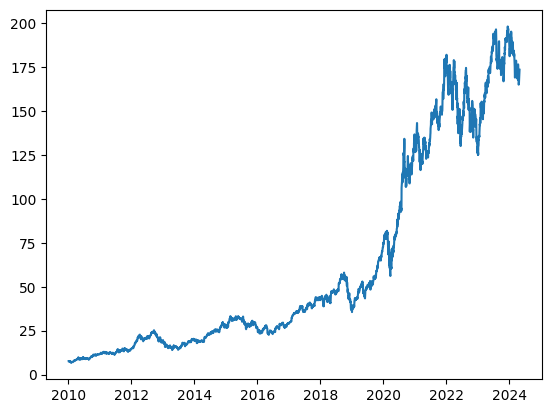

In [34]:
# we will be working on this close column
plt.plot(df.Close)

In [13]:
#moving avg (avg of a particular tym frame)for 101 value-it will find the mean  of the prev 100 closing value
ma100= df.Close.rolling(100).mean()# it will take 100 days closing price
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3599    182.3640
3600    182.1605
3601    181.9599
3602    181.7405
3603    181.5812
Name: Close, Length: 3604, dtype: float64

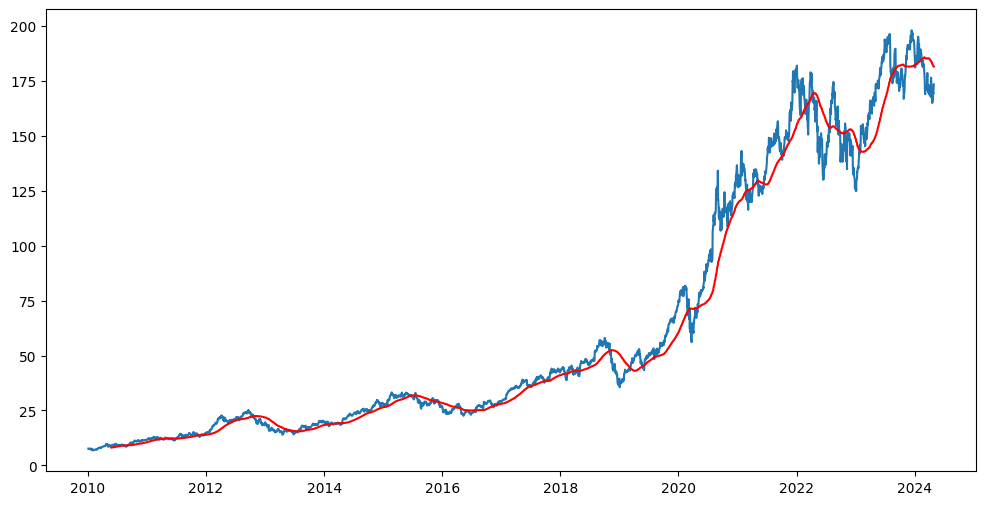

In [38]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
#ma200
ma200= df.Close.rolling(200).mean()
ma200 # first 200 days it would be null but starting  from201 values would be there

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3599    181.95095
3600    181.85300
3601    181.76205
3602    181.65970
3603    181.57450
Name: Close, Length: 3604, dtype: float64

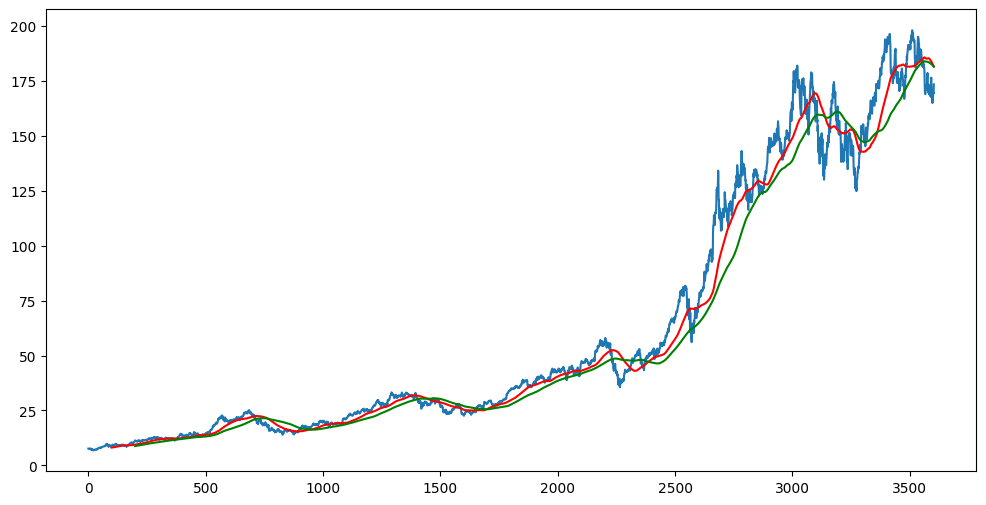

In [15]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [42]:
df.shape

(3604, 5)

In [16]:
# spliting our data into training and testing [70-30 ratio] for data prediction
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])   # strating from 0 index i have to 705 of the total values
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2522, 1)
(1082, 1)


In [17]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:

!pip install scikit-learn



In [19]:
#scaling down data between 0 and 1 for that to provide data to lstm model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [20]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01111695],
       [0.01130426],
       [0.009578  ],
       ...,
       [0.96016932],
       [0.97717883],
       [1.        ]])

In [21]:
x_train=[]
y_train=[]
#lets  we have taken the 10 days data and i have to prdicct the data for 11th one:
 #34,36,33,40,39,38,37,42,44,38..-#xtrain
#the value of 11th day will be dependent on these 10 values.. 10 step
#value at 11th day be y train[]- eg43
# in our model we willl be taking 100 steps
# to predict 12th dayy data , 34 will be gone 43 will v=become part of my x train
for i in range(100,data_training_array.shape[0]):
      x_train.append(data_training_array[i-100:i])
      y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array (y_train) 

In [93]:
!pip install keras

In [81]:
!pip install --upgrade pip


In [82]:
!pip install tensorflow



In [22]:
#ml model
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [23]:

x_train.shape #  2422 rows 100 columns

(2422, 100, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


# Initialize the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))  # Predicting the closing price



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                │ (None, 100, 50)     │      10,400 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout (Dropout)          │ (None, 100, 50)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_1 (LSTM)              │ (None, 100, 60)     │      26,640 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_1 (Dropout)        │ (None, 100, 60)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_2 (LSTM)              │ (None, 100, 80)     │      45,120 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_2 (Dropout)        │ (None, 100, 80)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_3 (LSTM)              │ (None, 120)         │      96,480 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_3 (Dropout)        │ (None, 120)         │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense (Dense)              │ (None, 1)           │         121 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - loss: 0.0454
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0048
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0044
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0043
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0035
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0030
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0031
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0033
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0024
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0025
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0027
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0023
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0023
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0019
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
2522,77.582497
2523,79.239998
2524,78.169998
2525,77.834999
2526,78.809998


In [29]:
data_training.tail(100) # these r the 100 values which i need to append to my data testing, so i should be able to predict the values for
# startining from 2522 to the 99 days

,Close
2422,52.587502
2423,52.590000
2424,53.160000
2425,53.115002
2426,50.660000
...,...
2517,74.357498
2518,74.949997
2519,74.597504
2520,75.797501


In [31]:
# for predicting the closing value for 2522 index i need the prev 100 days data and those 100 values are present in my training data
past_100_days= data_training.tail(100)
# my motive is to predict the values for testing data, for which i need prev 100 days for 2522 i don.t have the prev 100 days

In [39]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [43]:
final_df # this is the testing data

,Close
0,52.587502
1,52.590000
2,53.160000
3,53.115002
4,50.660000
...,...
1177,166.899994
1178,169.020004
1179,169.889999
1180,169.300003


In [46]:
#scale it down
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01307224],
       [0.01308918],
       [0.0169549 ],
       ...,
       [0.80861308],
       [0.80461175],
       [0.83309596]])

In [47]:
input_data.shape # it consist of 1182 rows and 1 cloumn

(1182, 1)

In [48]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [52]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1082, 100, 1)
(1082,)


In [55]:
# making prediction
y_predicted= model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step


In [56]:
y_predicted.shape

(1082, 1)

In [57]:
y_test

array([0.1825873 , 0.1938284 , 0.18657171, ..., 0.80861308, 0.80461175,
       0.83309596])

In [58]:
y_predicted

array([[0.19102228],
       [0.19367278],
       [0.19643879],
       ...,
       [0.788537  ],
       [0.7827258 ],
       [0.7791122 ]], dtype=float32)

In [59]:
#scale them up by finding the factor by which they r scale down
scaler.scale_

array([0.00678196])

In [60]:
scale_factor=1/0.00678196
y_predicted= y_predicted* scale_factor
y_test= y_test*scale_factor

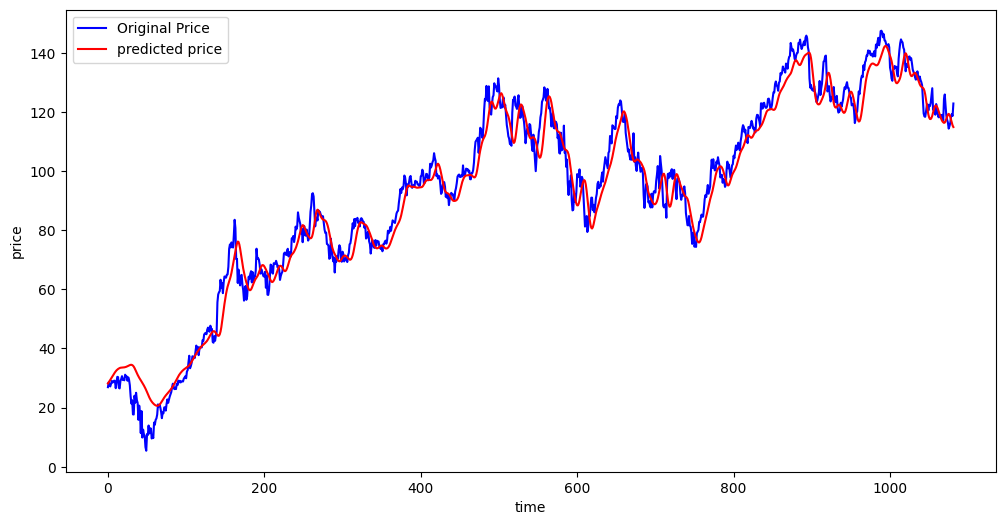

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label ='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()
